In [1]:
#import packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#define function that cleans the dataset

def clean_data(df):
    
    #drop columns with more than 50 empty columns
    
    df.dropna(axis=1,thresh=50, inplace=True)

    #drop the indicator name,code variables as they aren't noisy

    df.drop(["Indicator Name", "Indicator Code"], axis=1,inplace=True)

    #drop rows with more than 12 missing years
    df.dropna(axis=0,thresh=12, inplace=True)

    # fill empty values with 0
    df = df.fillna(0)

    return df

In [3]:
#function to left join df with the income/region metadata and separate them into 2 different dfs country and region

# left join the 2 dataframes
def separate_df(data_df, metadata_df):
    
    combined_df= pd.merge(data_df,metadata_df, on='Country Code', how='left')
    
    # seperate countries and regions in 2 different dataframes
    
    country_df = combined_df[combined_df["Region"].notna()]
    region_df = combined_df[combined_df["Region"].isna()]
    
    region_df.drop(["Region", "IncomeGroup"], axis=1, inplace=True)
    
    return country_df, region_df

In [4]:

#define function to create dummies for given column and remove it from df

def create_dummies(df,col_name):
    
    #turn column into dummies
    
    enc = pd.get_dummies( df[col_name])
    
    #join dummies at the end of df
    
    df = pd.concat([df, enc], axis=1)
    
    #drop original column from df
    
    df.drop(col_name,axis=1,inplace=True)
    
    return df

In [5]:
#import international inbound tourist data from csv and clean the data

tourist_df=pd.read_csv("API_ST.INT.ARVL_DS2_en_csv_v2_103871.csv", skiprows=4)

tourist_df = clean_data(tourist_df)

tourist_df

,Country Name,Country Code,1995,1996,1997,1998,1999,2000,2001,2002,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,6.190000e+05,6.410000e+05,6.500000e+05,6.470000e+05,6.830000e+05,7.210000e+05,6.910000e+05,6.430000e+05,...,8.270000e+05,8.130000e+05,8.240000e+05,8.690000e+05,9.040000e+05,9.790000e+05,1.072000e+06,1.225000e+06,1.102000e+06,1.070500e+06
2,Angola,AGO,9.000000e+03,2.100000e+04,4.500000e+04,5.200000e+04,4.500000e+04,5.100000e+04,6.700000e+04,9.100000e+04,...,2.940000e+05,3.660000e+05,4.250000e+05,4.810000e+05,5.280000e+05,6.500000e+05,5.950000e+05,5.920000e+05,3.970000e+05,2.610000e+05
3,Albania,ALB,3.040000e+05,2.870000e+05,1.190000e+05,1.840000e+05,3.710000e+05,3.170000e+05,3.540000e+05,4.700000e+05,...,1.247000e+06,1.711000e+06,2.191000e+06,2.469000e+06,3.156000e+06,2.857000e+06,3.341000e+06,3.784000e+06,4.070000e+06,4.643000e+06
4,Andorra,AND,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.347000e+06,2.949000e+06,3.516000e+06,3.387000e+06,...,2.059000e+06,1.830000e+06,1.808000e+06,2.242000e+06,2.238000e+06,2.328000e+06,2.363000e+06,2.663000e+06,2.831000e+06,0.000000e+00
5,Arab World,ARB,2.115522e+07,2.192905e+07,2.384332e+07,2.623208e+07,3.010843e+07,3.391257e+07,3.478617e+07,3.904145e+07,...,7.456862e+07,7.372749e+07,8.459515e+07,7.090156e+07,7.899196e+07,7.869716e+07,8.415708e+07,7.885381e+07,7.636341e+07,8.221460e+07
6,United Arab Emirates,ARE,2.315000e+06,2.572000e+06,2.476000e+06,2.991000e+06,3.393000e+06,3.907000e+06,4.134000e+06,5.445000e+06,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,Argentina,ARG,2.289000e+06,2.614000e+06,2.764000e+06,3.012000e+06,2.898000e+06,2.909000e+06,2.620000e+06,2.820000e+06,...,4.700000e+06,4.308000e+06,5.325000e+06,5.705000e+06,5.587000e+06,5.246000e+06,5.931000e+06,5.736000e+06,6.655000e+06,6.720000e+06
8,Armenia,ARM,1.200000e+04,1.300000e+04,2.300000e+04,3.200000e+04,4.100000e+04,4.500000e+04,1.230000e+05,1.620000e+05,...,5.580000e+05,5.750000e+05,6.840000e+05,7.580000e+05,9.630000e+05,1.084000e+06,1.204000e+06,1.192000e+06,1.260000e+06,1.495000e+06
9,American Samoa,ASM,3.400000e+04,3.500000e+04,2.600000e+04,3.600000e+04,4.100000e+04,4.400000e+04,3.600000e+04,0.000000e+00,...,2.430000e+04,2.350000e+04,2.310000e+04,2.260000e+04,2.260000e+04,2.080000e+04,2.160000e+04,2.030000e+04,2.010000e+04,2.000000e+04
10,Antigua and Barbuda,ATG,2.200000e+05,2.280000e+05,2.400000e+05,2.340000e+05,2.320000e+05,2.070000e+05,2.150000e+05,2.180000e+05,...,2.660000e+05,2.340000e+05,2.300000e+05,2.410000e+05,2.470000e+05,2.430000e+05,2.490000e+05,2.500000e+05,2.650000e+05,2.470000e+05


In [6]:
# import expenditure data from csv and clean data 

receipt_df = pd.read_csv("API_ST.INT.ARVL_DS2_en_csv_v2_103871.csv", skiprows=4)

receipt_df = clean_data(receipt_df)

In [7]:
# import GDP and investment information
investment_GDP_df = pd.read_csv("Public_Private Spending on travel and Tourism service.csv")

investment_GDP_df.dropna(axis=1,thresh=50, inplace=True)

investment_GDP_df.drop(["Country Name", "Indicator Id"], axis=1,inplace=True)

investment_GDP_df.dropna(axis=0,thresh=12, inplace=True)

investment_GDP_df = investment_GDP_df.fillna(0)

In [8]:
start_up_df = pd.read_csv("Start-up procedures to register a business.csv",skiprows =4)
start_up_df = clean_data(start_up_df)
start_up_df

,Country Name,Country Code,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,Afghanistan,AFG,0.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
2,Angola,AGO,12.000000,12.000000,12.000000,12.000000,12.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000
3,Albania,ALB,12.000000,12.000000,12.000000,12.000000,11.000000,8.000000,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
5,Arab World,ARB,12.307692,11.687500,11.333333,11.333333,10.450000,9.550000,9.300000,9.400000,9.250000,9.142857,8.904762,8.714286,8.590909,8.363636,7.863636,7.181818
6,United Arab Emirates,ARE,10.000000,10.000000,10.000000,10.000000,9.000000,9.000000,8.000000,8.000000,7.000000,6.000000,6.000000,6.000000,6.000000,4.000000,4.000000,2.000000
7,Argentina,ARG,13.000000,13.000000,13.000000,13.000000,13.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,11.000000
8,Armenia,ARM,10.000000,10.000000,10.000000,9.000000,9.000000,9.000000,6.000000,6.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
10,Antigua and Barbuda,ATG,0.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
11,Australia,AUS,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
12,Austria,AUT,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [9]:
# import country region and income information

country_info = pd.read_csv("Metadata_Country_API_ST.INT.ARVL_DS2_en_csv_v2_103871.csv", usecols=[0,1,2])

In [10]:
tourist_country_df, tourist_region_df = separate_df (tourist_df, country_info)
tourist_country_df, tourist_region_df

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(                       Country Name Country Code        1995        1996  \
 0                             Aruba          ABW    619000.0    641000.0   
 1                            Angola          AGO      9000.0     21000.0   
 2                           Albania          ALB    304000.0    287000.0   
 3                           Andorra          AND         0.0         0.0   
 5              United Arab Emirates          ARE   2315000.0   2572000.0   
 6                         Argentina          ARG   2289000.0   2614000.0   
 7                           Armenia          ARM     12000.0     13000.0   
 8                    American Samoa          ASM     34000.0     35000.0   
 9               Antigua and Barbuda          ATG    220000.0    228000.0   
 10                        Australia          AUS   3726000.0   4165000.0   
 11                          Austria          AUT  17173000.0  17090000.0   
 12                       Azerbaijan          AZE         0.0         0.0   

In [11]:
receipt_country_df, receipt_region_df = separate_df (receipt_df, country_info)
receipt_country_df.describe()

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,...,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02
mean,2.502719e+06,2.644958e+06,2.787999e+06,2.917183e+06,3.048044e+06,3.325101e+06,3.329925e+06,3.432329e+06,3.389798e+06,3.709605e+06,...,4.569653e+06,4.376524e+06,4.659095e+06,4.843030e+06,5.096929e+06,5.351894e+06,5.589622e+06,5.820151e+06,6.026339e+06,6.416519e+06
std,6.931505e+06,7.303604e+06,7.702098e+06,7.909420e+06,8.275232e+06,8.793166e+06,8.624354e+06,8.798781e+06,8.559649e+06,8.995041e+06,...,1.043352e+07,9.974320e+06,1.037983e+07,1.089911e+07,1.124151e+07,1.163801e+07,1.206248e+07,1.246603e+07,1.264451e+07,1.342681e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+04,6.900000e+04,7.600000e+04,7.800000e+04,7.500000e+04,8.600000e+04,9.900000e+04,1.010000e+05,1.220000e+05,1.340000e+05,...,2.580000e+05,2.320000e+05,2.300000e+05,2.360000e+05,2.400000e+05,2.360000e+05,2.350000e+05,2.550000e+05,2.560000e+05,1.990000e+05
50%,2.850000e+05,3.150000e+05,3.590000e+05,3.870000e+05,4.300000e+05,4.590000e+05,4.610000e+05,4.870000e+05,5.310000e+05,5.660000e+05,...,8.670000e+05,8.710000e+05,9.350000e+05,9.200000e+05,9.880000e+05,1.084000e+06,1.204000e+06,1.255000e+06,1.323000e+06,1.402000e+06
75%,1.760000e+06,1.926000e+06,2.010000e+06,2.090000e+06,2.250000e+06,2.649000e+06,2.620000e+06,2.661000e+06,2.726000e+06,2.928000e+06,...,3.716000e+06,3.228000e+06,3.520000e+06,3.917000e+06,4.164000e+06,4.690000e+06,4.855000e+06,5.237000e+06,5.393000e+06,6.252000e+06
max,6.003300e+07,6.240600e+07,6.659100e+07,7.010900e+07,7.314700e+07,7.719000e+07,7.520200e+07,7.701200e+07,7.504800e+07,7.443300e+07,...,7.921800e+07,7.676400e+07,7.664700e+07,8.049900e+07,8.198000e+07,8.363400e+07,8.370100e+07,8.445200e+07,8.268200e+07,8.686100e+07


In [12]:
start_up_country_df, start_up_region_df = separate_df (start_up_df, country_info)
start_up_country_df, start_up_region_df

(                       Country Name Country Code  2003  2004  2005  2006  \
 0                       Afghanistan          AFG   0.0   4.0   4.0   4.0   
 1                            Angola          AGO  12.0  12.0  12.0  12.0   
 2                           Albania          ALB  12.0  12.0  12.0  12.0   
 4              United Arab Emirates          ARE  10.0  10.0  10.0  10.0   
 5                         Argentina          ARG  13.0  13.0  13.0  13.0   
 6                           Armenia          ARM  10.0  10.0  10.0   9.0   
 7               Antigua and Barbuda          ATG   0.0   0.0   9.0   9.0   
 8                         Australia          AUS   3.0   3.0   3.0   3.0   
 9                           Austria          AUT   8.0   8.0   8.0   8.0   
 10                       Azerbaijan          AZE  14.0  13.0  13.0  13.0   
 11                          Burundi          BDI   8.0   8.0   8.0   8.0   
 12                          Belgium          BEL   8.0   5.0   5.0   5.0   

In [13]:
#test dummy function
tourist_country_df = create_dummies(tourist_country_df,col_name ='IncomeGroup')
tourist_country_df

,Country Name,Country Code,1995,1996,1997,1998,1999,2000,2001,2002,...,2013,2014,2015,2016,2017,Region,High income,Low income,Lower middle income,Upper middle income
0,Aruba,ABW,619000.0,641000.0,650000.0,647000.0,683000.0,721000.0,691000.0,643000.0,...,979000.0,1072000.0,1225000.0,1102000.0,1070500.0,Latin America & Caribbean,1,0,0,0
1,Angola,AGO,9000.0,21000.0,45000.0,52000.0,45000.0,51000.0,67000.0,91000.0,...,650000.0,595000.0,592000.0,397000.0,261000.0,Sub-Saharan Africa,0,0,1,0
2,Albania,ALB,304000.0,287000.0,119000.0,184000.0,371000.0,317000.0,354000.0,470000.0,...,2857000.0,3341000.0,3784000.0,4070000.0,4643000.0,Europe & Central Asia,0,0,0,1
3,Andorra,AND,0.0,0.0,0.0,0.0,2347000.0,2949000.0,3516000.0,3387000.0,...,2328000.0,2363000.0,2663000.0,2831000.0,0.0,Europe & Central Asia,1,0,0,0
5,United Arab Emirates,ARE,2315000.0,2572000.0,2476000.0,2991000.0,3393000.0,3907000.0,4134000.0,5445000.0,...,0.0,0.0,0.0,0.0,0.0,Middle East & North Africa,1,0,0,0
6,Argentina,ARG,2289000.0,2614000.0,2764000.0,3012000.0,2898000.0,2909000.0,2620000.0,2820000.0,...,5246000.0,5931000.0,5736000.0,6655000.0,6720000.0,Latin America & Caribbean,0,0,0,1
7,Armenia,ARM,12000.0,13000.0,23000.0,32000.0,41000.0,45000.0,123000.0,162000.0,...,1084000.0,1204000.0,1192000.0,1260000.0,1495000.0,Europe & Central Asia,0,0,0,1
8,American Samoa,ASM,34000.0,35000.0,26000.0,36000.0,41000.0,44000.0,36000.0,0.0,...,20800.0,21600.0,20300.0,20100.0,20000.0,East Asia & Pacific,0,0,0,1
9,Antigua and Barbuda,ATG,220000.0,228000.0,240000.0,234000.0,232000.0,207000.0,215000.0,218000.0,...,243000.0,249000.0,250000.0,265000.0,247000.0,Latin America & Caribbean,1,0,0,0
10,Australia,AUS,3726000.0,4165000.0,4318000.0,4167000.0,4459000.0,4931000.0,4856000.0,4841000.0,...,6482000.0,6922000.0,7450000.0,8269000.0,8815000.0,East Asia & Pacific,1,0,0,0


In [14]:
#sort region data from highest to lowest values in 2016

tourist_region_df.sort_values("2016",inplace=True, ascending=False)
receipt_region_df.sort_values("2016",inplace=True, ascending=False)

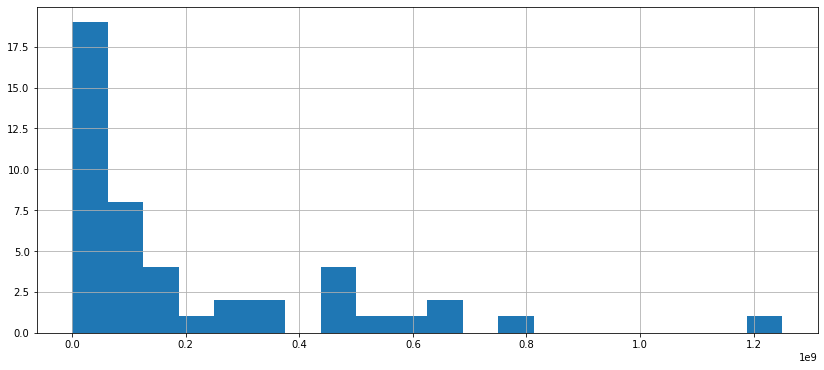

In [15]:
#plot histogram?
tourist_region_df["2016"].hist(bins=20, figsize=[14,6])

In [16]:
#get all the values in the rows for Country Name
region_cols =tourist_region_df['Country Name'].values

In [17]:
#seperate them according to specific words in the name
income_cols = [s for s in list(region_cols) if "income" in s]
dividend_cols =[s for s in list(region_cols) if "dividend" in s]
IDA_IBRD_cols =[s for s in list(region_cols) if ("IDA" in s or "IBRD" in s)]
not_classified_cols =[s for s in list(region_cols) if "not classified" in s]
organization_cols =[s for s in list(region_cols) if ("OECD members" in s or "Arab World" in s)]
small_states_cols =[s for s in list(region_cols) if "small states" in s]
other_cols =[s for s in list(region_cols) if ("Fragile and conflict affected situations" in s or "Heavily indebted poor countries (HIPC)" in s or "Least developed countries: UN classification" in s or "World" in s)]
group_region_cols =[s for s in list(region_cols) if ("Central Europe and the Baltics" in s or "Caribbean small states" in s or "East Asia & Pacific (excluding high income)" in s or "East Asia & Pacific" in s or "Europe & Central Asia (excluding high income)" in s or "Europe & Central Asia" in s or "Euro area" in s or "European Union" in s or "Latin America & Caribbean (excluding high income)" in s or "Latin America & Caribbean" in s or "Middle East & North Africa (excluding high income)" in s or "Middle East & North Africa" in s or "Sub-Saharan Africa (excluding high income)" in s or "Sub-Saharan Africa" in s)]
group_region_cols

['Europe & Central Asia',
 'European Union',
 'Euro area',
 'East Asia & Pacific',
 'East Asia & Pacific (excluding high income)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Europe & Central Asia (excluding high income)',
 'Latin America & Caribbean',
 'Middle East & North Africa',
 'Latin America & Caribbean (excluding high income)',
 'Central Europe and the Baltics',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (IDA & IBRD countries)',
 'Middle East & North Africa (excluding high income)',
 'Sub-Saharan Africa (excluding high income)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Caribbean small states']

In [18]:
#assign a classification to each list of names
def cond(x):
    if x in dividend_cols:
        return "Dividend" 
    elif x in IDA_IBRD_cols:
        return "IDA & IBRD" 
    elif x in income_cols:
        return "Income"
    elif x in not_classified_cols:
        return "Not Classified"
    elif x in organization_cols:
        return "Organization"
    elif x in small_states_cols:
        return "Small_States"
    elif x in other_cols:
        return "Other"
    elif x in group_region_cols:
        return "Group Region"
    else:
        return "Country"
    return x

#assign classfication for every name in Country Name column
cat_col = [cond(x) for x in tourist_region_df['Country Name']] 

#position we want to insert in df (3rd column)
idx = 2
#insert in existing df
tourist_region_df.insert(loc=idx, column='Location Group', value=cat_col)
#show first 10 values to test it worked
tourist_region_df.head(10)

,Country Name,Country Code,Location Group,1995,1996,1997,1998,1999,2000,2001,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
241,World,WLD,Other,5.239096e+08,5.545516e+08,5.843048e+08,6.022473e+08,6.272079e+08,6.773870e+08,6.782462e+08,...,9.363609e+08,8.975338e+08,9.563723e+08,9.975553e+08,1.054602e+09,1.106732e+09,1.159450e+09,1.206216e+09,1.250468e+09,1.341457e+09
87,High income,HIC,Income,3.788522e+08,3.936993e+08,4.145348e+08,4.285978e+08,4.448873e+08,4.722706e+08,4.639270e+08,...,5.720495e+08,5.441974e+08,5.742045e+08,6.002581e+08,6.266071e+08,6.584570e+08,6.995938e+08,7.330564e+08,7.686113e+08,8.147399e+08
166,OECD members,OED,Organization,3.585940e+08,3.731950e+08,3.908013e+08,4.035437e+08,4.151737e+08,4.402514e+08,4.293773e+08,...,5.239680e+08,5.016400e+08,5.216800e+08,5.454750e+08,5.637250e+08,5.921553e+08,6.302726e+08,6.641770e+08,6.873700e+08,7.387490e+08
182,Post-demographic dividend,PST,Dividend,3.291888e+08,3.429809e+08,3.659201e+08,3.780410e+08,3.909029e+08,4.177407e+08,4.143457e+08,...,5.192565e+08,4.944450e+08,5.187433e+08,5.428600e+08,5.691869e+08,5.987758e+08,6.194239e+08,6.475276e+08,6.862630e+08,7.311272e+08
61,Europe & Central Asia,ECS,Group Region,2.955132e+08,3.116283e+08,3.366543e+08,3.468680e+08,3.551063e+08,3.830515e+08,3.841048e+08,...,4.932211e+08,4.681120e+08,4.805914e+08,5.127784e+08,5.386314e+08,5.677226e+08,5.797844e+08,6.038805e+08,6.159794e+08,6.695441e+08
95,IDA & IBRD total,IBT,IDA & IBRD,1.661324e+08,1.830733e+08,1.935366e+08,1.965972e+08,2.030591e+08,2.269594e+08,2.348990e+08,...,3.851365e+08,3.732651e+08,4.030467e+08,4.206537e+08,4.534613e+08,4.749737e+08,4.869817e+08,5.027129e+08,5.136785e+08,5.615830e+08
69,European Union,EUU,Group Region,2.587999e+08,2.677640e+08,2.850780e+08,2.970440e+08,3.068010e+08,3.248400e+08,3.203740e+08,...,3.811600e+08,3.629120e+08,3.718430e+08,3.919400e+08,4.021580e+08,4.212660e+08,4.421430e+08,4.637260e+08,4.846420e+08,5.226200e+08
128,Low & middle income,LMY,Income,1.419560e+08,1.574997e+08,1.662356e+08,1.700167e+08,1.785592e+08,2.012201e+08,2.107233e+08,...,3.605269e+08,3.497466e+08,3.783944e+08,3.933385e+08,4.240559e+08,4.441156e+08,4.552279e+08,4.681974e+08,4.764683e+08,5.213047e+08
94,IBRD only,IBD,IDA & IBRD,1.533753e+08,1.685863e+08,1.780072e+08,1.797196e+08,1.856425e+08,2.085053e+08,2.156061e+08,...,3.455012e+08,3.324917e+08,3.581619e+08,3.750808e+08,4.050741e+08,4.223739e+08,4.317754e+08,4.437688e+08,4.538836e+08,4.956879e+08
143,Middle income,MIC,Income,1.364637e+08,1.513786e+08,1.597886e+08,1.631518e+08,1.714744e+08,1.930651e+08,2.023099e+08,...,3.420829e+08,3.306500e+08,3.560249e+08,3.730853e+08,4.021694e+08,4.214041e+08,4.320154e+08,4.453550e+08,4.528075e+08,4.957631e+08


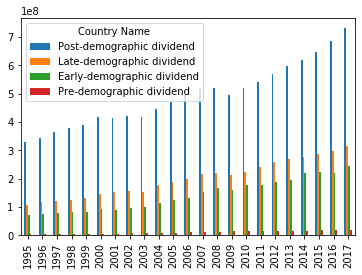

In [19]:
%matplotlib inline
#pivot dataframe and do a bar plot for last 10 years and top 10 regions
region_df_test=tourist_region_df.set_index("Country Name")
region_df_test=region_df_test[region_df_test['Location Group']=="Dividend"].T
region_cols =region_df_test.columns.values
region_df_test.iloc[2:].plot(y=region_cols, kind="bar")